**Group No:** 9

**Student Name**: Wan Barmawi Muhammad Razaq S2819201

**Student Name**: Hakan Tirsi S3105555


This notebook consist only of week 3 Excercise 7 and 8. Python 3.8 is needed to run the code.

### (Regular)Exercise 7
Use the shap library and the provided starter code to explain the MNIST data set.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

2024-06-14 14:53:38.692663: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-14 14:53:40.113214: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-06-14 14:53:40.113339: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-06-

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)

(60000, 28, 28)


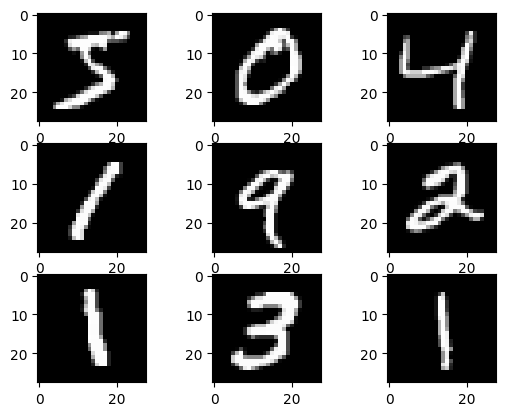

In [4]:
for i in range(9):
    plt.subplot(330 + 1 + i) #A number of rows in the grid, B = number of columns in the grid, C =index of the subplot within the grid
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show

In [5]:
import numpy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils

In [6]:
# flatten the images 28X28 to a vector by 784. THis is needed because our NN only accepts a 1D Vector
#Total num of pixels = height * width
num_pixels = X_train.shape[1] * X_train.shape[2]

#Reshape all images into 784 1D
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [7]:
#Normalize the input data, scaling them in a range from 0-1
#Leads to better efficieny in by having a smaller input range
X_train = X_train / 255
X_test = X_test / 255

In [8]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
# define baseline model
def baseline_model():
    #We create a linear stack of layers in keras using the Sequential class. 
    #Each layer has exactly one input and output tensor
    model = Sequential()
    #Fully connected layer, input dim == num of pixels, kernerl_initializer WEIGHT = normal
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',
    activation='relu'))
    #Adding A the output layer, softmax activation to converts raw score into probabilities.
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Creating the Loss function in the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

2024-06-14 14:53:44.507017: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: /usr/lib/x86_64-linux-gnu/libcuda.so.1: file too short; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-06-14 14:53:44.507040: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
300/300 - 2s - loss: 0.2736 - accuracy: 0.9224 - val_loss: 0.1354 - val_accuracy: 0.9610 - 2s/epoch - 7ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1063 - accuracy: 0.9696 - val_loss: 0.0906 - val_accuracy: 0.9739 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0685 - accuracy: 0.9806 - val_loss: 0.0750 - val_accuracy: 0.9762 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0482 - accuracy: 0.9865 - val_loss: 0.0663 - val_accuracy: 0.9789 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0351 - accuracy: 0.9898 - val_loss: 0.0646 - val_accuracy: 0.9790 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0242 - accuracy: 0.9937 - val_loss: 0.0605 - val_accuracy: 0.9806 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0187 - accuracy: 0.9955 - val_loss: 0.0636 - val_accuracy: 0.9790 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0135 - accuracy: 0.9969 - val_loss: 0.0593 - val_accuracy: 0.9809 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s 

In [11]:
import numpy as np
predictions = model.predict(X_test)
#Returns an np array with each row corresponding to the predicted probabilities.
predicted_labels = np.argmax(predictions, axis = 1) #Return maximum value for each prediction, for each row
actual_labels = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 1ms/step


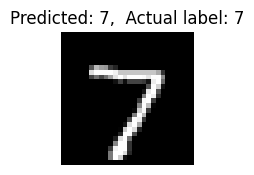

In [12]:
plt.figure(figsize=(10,10))
for i in range(1):
    plt.subplot(5,5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]},  Actual label: {actual_labels[i]}")
    plt.axis('off')
plt.show()

In [13]:
#pip install shap


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# Assuming the model and data are defined
explainer = shap.KernelExplainer(model.predict, X_train[:100])  # Using a subset of the training data
shap_values = explainer.shap_values(X_test[:5])  # Explain the predictions for the first test image



4/4 [==============================] - 0s 2ms/step


  0%|          | 0/5 [00:00<?, ?it/s]

9532/9532 [==============================] - 14s 1ms/step


In [15]:
# Reshape the SHAP values to (5, 28, 28, 1)
reshaped_shap_values = np.reshape(shap_values[0], (5, 28, 28, 1))

# Reshape the test images to (5, 28, 28, 1) as well
reshaped_test_images = X_test[:5].reshape((5, 28, 28, 1))

# Predict labels for the first 5 test images
predicted_labels = model.predict(X_test[:5])
predicted_labels = np.argmax(predicted_labels, axis=1) #Get the highest probability/indicie of the label

actual_labels = np.argmax(y_test[:5], axis=1) #Get the highest probability/indicie of the label



1/1 [==============================] - 0s 34ms/step


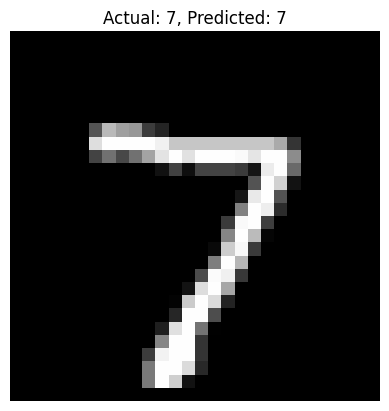

<Figure size 640x480 with 0 Axes>

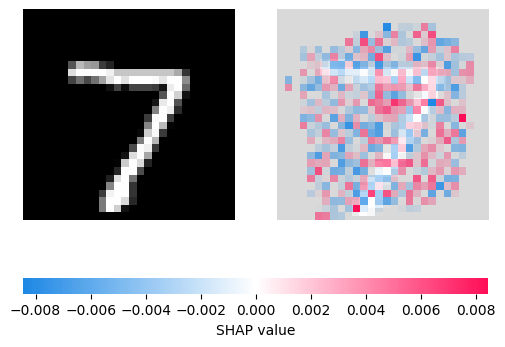

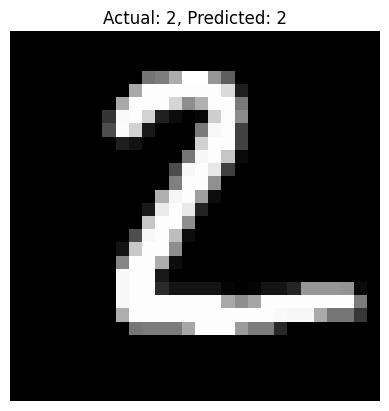

<Figure size 640x480 with 0 Axes>

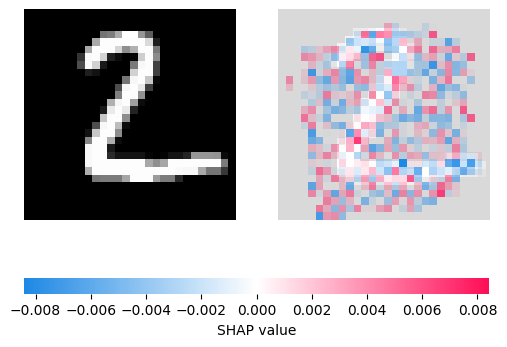

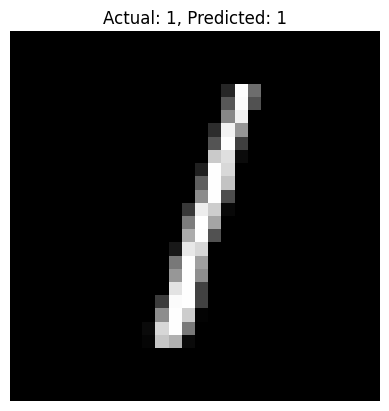

<Figure size 640x480 with 0 Axes>

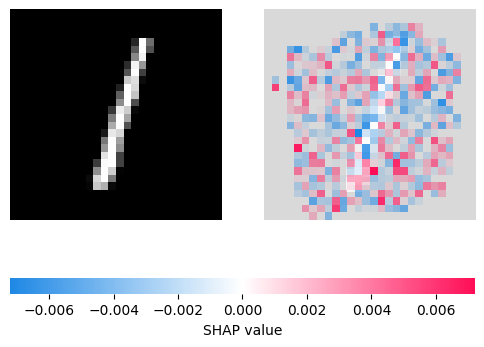

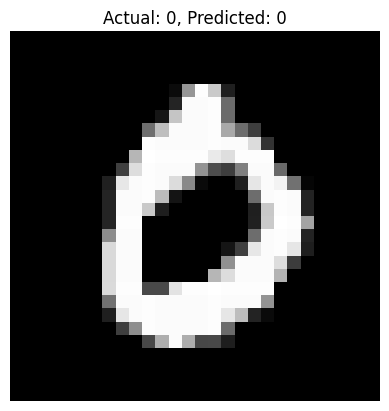

<Figure size 640x480 with 0 Axes>

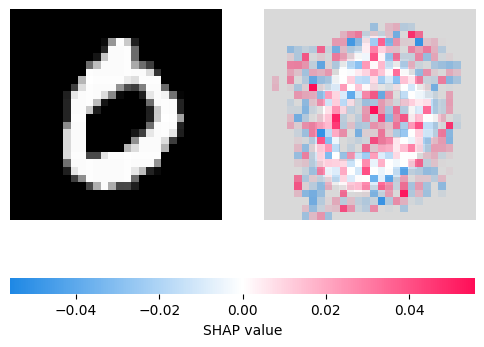

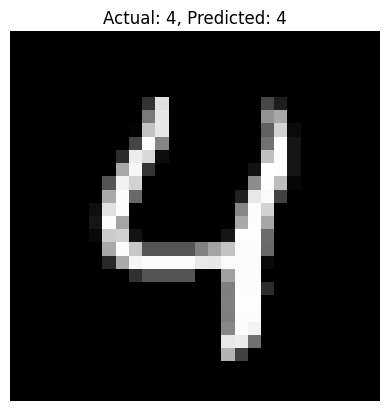

<Figure size 640x480 with 0 Axes>

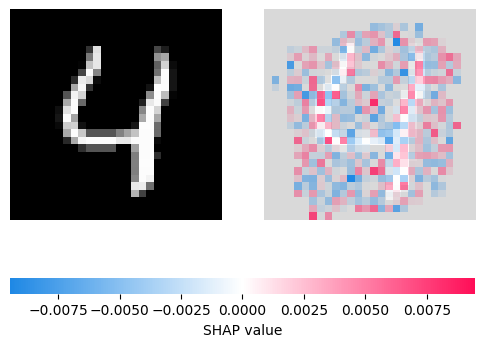

In [16]:
import matplotlib.pyplot as plt
import shap

for i in range(5):
    fig, ax = plt.subplots()
    ax.imshow(reshaped_test_images[i], cmap='gray',  interpolation='nearest')
    ax.set_title(f'Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}')
    ax.axis('off')
    
    plt.figure()
    shap.image_plot(reshaped_shap_values[i:i+1], reshaped_test_images[i:i+1])
    plt.show()
    


### Explain parts of the MNIST dataset with SHAP (Ex 7)

To keep it computational feasable, we only plotted 5 images.
The SHAP images provide pixel wise explainability, indicating which pixel pushed the prediction to the right answer with red color and the blue pixel which explains which pixels pushed the prediction to another label. The edges of each image consist of grey pixels, indicating that the edges of the images did not matter. However, there are a lot of pixels also outside the actual number. This makes for a human no sense but it did matter for the ML model to make a prediction. Overall, with these SHAP explainations we can see which pixel on the image contributed with or against the right prediction, but if this explainability realy makes sense is questionable.


### (Regular) Exercise 8
Explain what can be understood about the similarity of certain digits as seen by the machine learning model through the explanations.

Based on the 5 different images, We can see that most of the SHAP values are in and around the digit. Some of these SHAP values make less sense for the human eye, for example the number 1. The number is only a stright line but the shap values are also spread to both sides of the number.
So the space next to the number also had an impact on predicting the actual number. This would make sense if all the SHAP values outside the digit were blue, lowering the prediction to another value. However, Outside the number there are also red SHAP values, helping to predict to the right number.
Moreover, Some SHAP images got a very high SHAP values in places where it also does not make sense, for example some Outstanding Red squared near by the Number 1 and also the number 2 has some Outstanding Red Squares near the number 2. So eventhought the predictions are correct with the actual given label, how the model actually got the prediction does not always make sense for a human. 